In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
cmap = 'RdPu'

In [63]:
df = pd.read_csv('Credit Card Customer Data.csv')

In [64]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [65]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [66]:
df.shape

(660, 7)

In [67]:
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [68]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [69]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


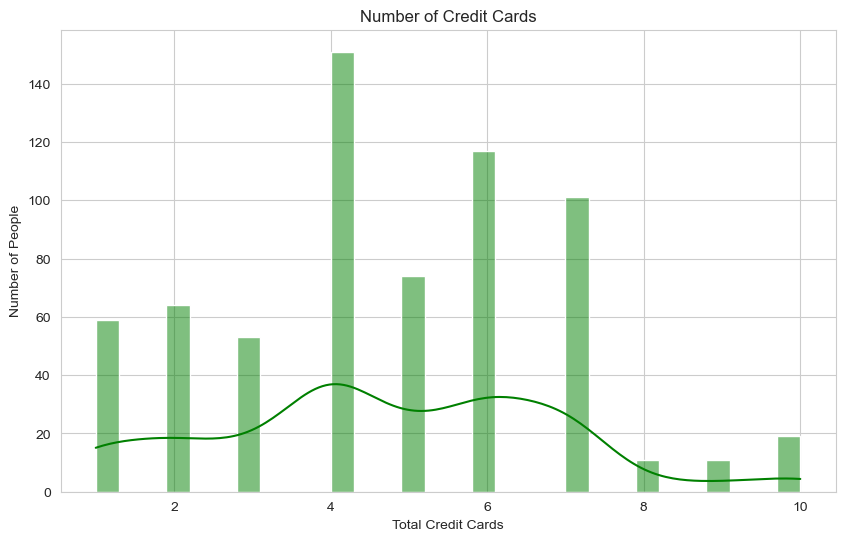

In [70]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Total_Credit_Cards", bins=30, kde=True, color='green')
plt.title('Number of Credit Cards')
plt.xlabel('Total Credit Cards')
plt.ylabel('Number of People')
plt.show()

In [71]:
total_visits_bank = df['Total_visits_bank'].sum()
total_visits_online = df['Total_visits_online'].sum()

In [72]:
labels = 'Total Visits in Bank', 'Total Visits Online'
sizes = [total_visits_bank, total_visits_online]
colors = ['gold', 'lightcoral']

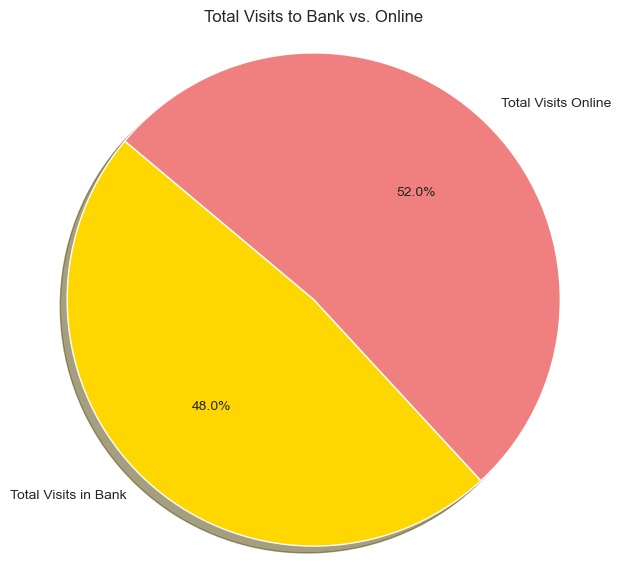

In [73]:
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle = 140)
plt.title('Total Visits to Bank vs. Online')
plt.axis('equal')
plt.show()

C:\Users\Noor Ramzan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Noor Ramzan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


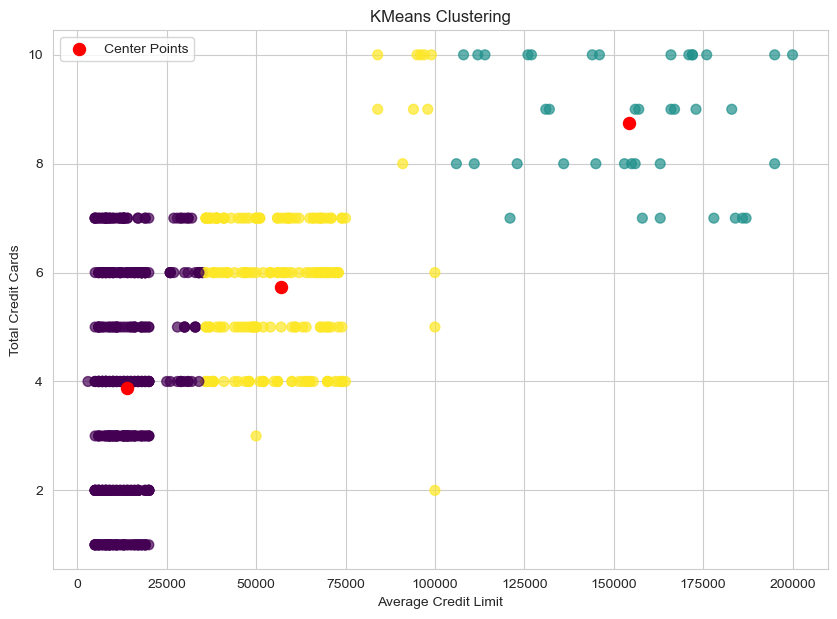

In [122]:
X = df[['Avg_Credit_Limit', 'Total_Credit_Cards']]

#number of clusters
k = 3


kmeans = KMeans(n_clusters=k, random_state=42)

# Fit
kmeans.fit(X)


labels = kmeans.labels_


plt.figure(figsize=(10, 7))


plt.scatter(X['Avg_Credit_Limit'], X['Total_Credit_Cards'], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='.', label='Center Points')
plt.title('KMeans Clustering')
plt.xlabel('Average Credit Limit')
plt.ylabel('Total Credit Cards')
plt.legend()
plt.grid(True)
plt.show()